<a href="https://colab.research.google.com/github/lrhf97/OpenCV/blob/main/image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, MaxPool2D, Dropout, Conv2D, Flatten
from keras.constraints import maxnorm
from keras.datasets import cifar10

# import matplotlib.pyplot as plt
import numpy as np


def reshape_image(input_image_arrays):
    output_array = []
    for image_array in input_image_arrays:
        output_array.append(image_array.reshape(-1))
    return np.asarray(output_array)


labels_array = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(len(x_train))

# first_image = x_train[0]
# print image
# print(first_image[0])
# plt.imshow(first_image)
# plt.show()
# max_label_index = np.argmax(train_labels[0])
# print(labels_array[max_label_index])

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

# print(x_test[0][0])


2021-10-21 11:33:31.394094: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-21 11:33:31.394120: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


50000


In [3]:

model = Sequential()

# filters; output 32 features (the image is 32hx32wx3colors
# kernel_size : 3x3 kernel or filter matrix used to calculate output features
# input_shape: each input is 32x32x3
# activation: relu is the best for this
# padding: 'same' adds padding to the input image to make sure that the output feature map is the same size as the input
# kernel_restraint: maxnorm normalizes the values in the kernel to make that the max value is 3
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))

# Add the max pool layer to decrease the image size form 2x32 to 16x16
# pool_size: finds the max value oin each 2x2 section of the input
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())

# First dense layer to create the actual prediction network
# units: 512 neurons at this layer, increase for greater accuracy, decrease for faster train speed
# kernel_constraint: see above
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))

# Dropout layer to ignore some neurons during training which improves model reliability
# rate: 0.5 means half the neurons dropped
model.add(Dropout(rate=0.5))

# Final dense layer used to produce output for each of the 10 categories
# units: 10 categories so 10 output units
# activation: softmax because we are calculating probabilities for each of the 10 categories (not as clear as 0 or 1)
model.add(Dense(10, activation='softmax'))

opt = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train, y=y_train, epochs=10, batch_size=32)

model.save(filepath='Image_classifer.h5')


2021-10-21 11:45:09.836931: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/10
1563/1563 [==============================] - 107s 68ms/step - loss: 1.9145 - accuracy: 0.3150
Epoch 2/10
1563/1563 [==============================] - 108s 69ms/step - loss: 1.6164 - accuracy: 0.4250
Epoch 3/10
1563/1563 [==============================] - 107s 68ms/step - loss: 1.4633 - accuracy: 0.4775
Epoch 4/10
1563/1563 [==============================] - 108s 69ms/step - loss: 1.3665 - accuracy: 0.5140
Epoch 5/10
1563/1563 [==============================] - 110s 70ms/step - loss: 1.2955 - accuracy: 0.5426
Epoch 6/10
1563/1563 [==============================] - 122s 78ms/step - loss: 1.2403 - accuracy: 0.5590
Epoch 7/10
1563/1563 [==============================] - 114s 73ms/step - loss: 1.1915 - accuracy: 0.5786
Epoch 8/10
1563/1563 [==============================] - 115s 74ms/step - loss: 1.1519 - accuracy: 0.5921
Epoch 9/10
1563/1563 [==============================] - 116s 74ms/step - loss: 1.1166 - accuracy: 0.6048
Epoch 10/10
1563/1563 [==============================] 

In [7]:
from keras.models import load_model

model = load_model(filepath ='/home/lrhf97/Desktop/forked_projects/OpenCV/Image_classifer.h5')
results = model.evaluate(x=x_test,y=y_test)
print("Test loss", results[0])
print("Test accuracy", results[1])

test_image = x_test[0]
test_image_data = np.asarray([test_image])
prediction = model.predict(x =test_image_data)
max_index = np.argmax(prediction[0])

print('Prediction' ,labels_array[max_index])




  1/313 [..............................] - ETA: 41s - loss: 0.7881 - accuracy: 0.6562

2021-10-21 12:06:19.775422: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 122880000 exceeds 10% of free system memory.


313/313 [==============================] - 4s 13ms/step - loss: 1.0996 - accuracy: 0.6054
Test loss 1.0996099710464478
Test accuracy 0.605400025844574
Prediction cat


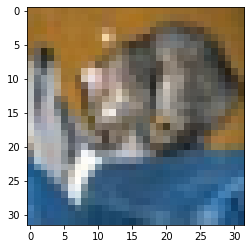

In [8]:
import matplotlib.pyplot as plt

plt.imshow(test_image)
plt.show()